In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("Classified Data", index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
# a ideia e criar um modelo que consiga predizer as classes alvo(TARGET CLASS) baseado nas caracteristicas dos elementos proximos.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [5]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [6]:
len(df.columns)

11

In [7]:
# o intuito e fazer calculo de distancias entre parametros e predizer os valores do campo alvo.
# o programa fara a classificacao conforme a proximidade dos pontos gerados pelas informacoes presentes.
# e possivel haver problemas quanto a ESCALA presente nos valores da tabela original, comprometendo a geracao do modelo de calculo.
# sendo assim, e necessario fazer uma NORMALIZACAO, caso contrario, seu modelo se baseara nos valores dos campos com maiores valores.
# importando os modos de PADRONIZACAO para prosseguir com a geracao do modelo.
from sklearn.preprocessing import StandardScaler

In [8]:
#inicializando em uma instancia.
scaler = StandardScaler()

In [9]:
#agora sera usado a variavel scaler para fazer as padronizacoes, usando uma BASE DE DADOS (com novos valores ajustados(FIT))
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [10]:
#transformando os valores dos campos da tabela original
df_normalizado = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [11]:
# agora, teremos novos valores refletidos pelos dados originais, objetivando fazer os calculos de KNN.
df_normalizado

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [12]:
#aqui, um DataFrame e criado, armazenando os valores da matriz feita acima. Exluindo a ultima coluna.
df_param = pd.DataFrame(df_normalizado, columns = df.columns[:-1])

In [13]:
#esses sao os valores que serao utilizados para o modelo efetuar calculos estatisticos.
df_param

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#separando os valores para criacao do modelo KNN
#df_param representa o X
#df['TARGET CLASS'] representa o Y
X_train, X_test, y_train, y_test, = train_test_split(df_param, df['TARGET CLASS'], test_size=0.3)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred = knn.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       140
           1       0.89      0.92      0.90       160

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [22]:
print(confusion_matrix(y_test, pred))

[[121  19]
 [ 13 147]]


In [23]:
#agora sera realizada varios calculos nos valores de K (n_neighbors=K) 1 a 40. para ver o resultado das combinacoes.
#assim sera treinado um modelo de cada vez para cada valor de k.

error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test)) # testando a media dos valores e armazenando a media quando forem diferentes do 
#y_test. para verificar as variacoes do modelo.

In [24]:
error_rate

[0.10666666666666667,
 0.1,
 0.09,
 0.07333333333333333,
 0.06666666666666667,
 0.056666666666666664,
 0.06,
 0.056666666666666664,
 0.06333333333333334,
 0.06,
 0.06666666666666667,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.06,
 0.05333333333333334,
 0.056666666666666664,
 0.05333333333333334,
 0.06333333333333334,
 0.06,
 0.06333333333333334,
 0.06,
 0.06333333333333334,
 0.06666666666666667,
 0.06666666666666667,
 0.06333333333333334,
 0.06666666666666667,
 0.06,
 0.06,
 0.06,
 0.06333333333333334,
 0.06,
 0.06333333333333334,
 0.06,
 0.06,
 0.06333333333333334,
 0.06,
 0.056666666666666664]

Text(0, 0.5, 'Taxa de erro.')

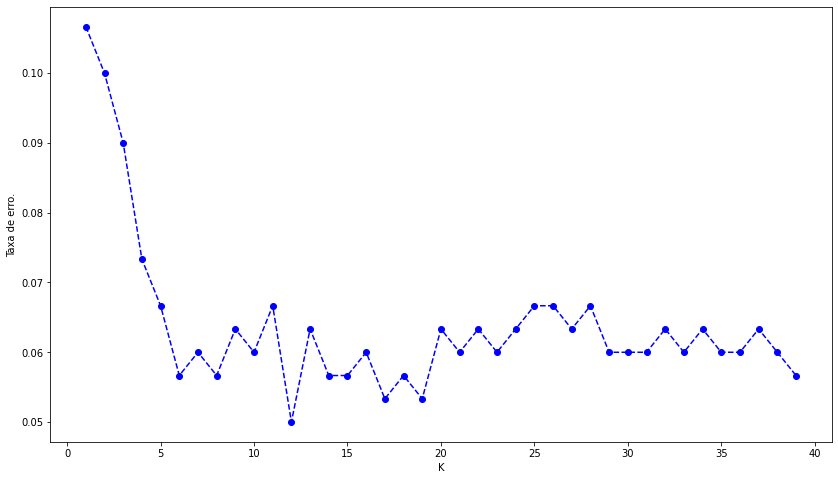

In [25]:
#visualizando os valores do campo anterior em forma grafica.
plt.figure(figsize=(14,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('K')
plt.ylabel('Taxa de erro.')

In [26]:
#aqui, vemos que conseguimos um modelo coerente com os valores entre 24 e 28 para K. 
#vemos tb que nao conseguimos otimizar o modelo aumentando o valor de k.

In [27]:
#realizando o teste com o valor de k=24 (VER GRAFICO). PARA VER O COMPORTAMENTO DO MODELO.
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [28]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       140
           1       0.93      0.96      0.94       160

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [29]:
#agora vemos que temos uma boa margem de acerto para os valores contidos na tabela acima.
#baseado nos calculos do modelo onde o k = 24.